# Linear Regression

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing dataset

In [2]:
df = pd.read_csv('../Data/Salary_dataset.csv')
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


Analyzing dataset

In [3]:
df.drop(columns=['Unnamed: 0'], inplace = True)

In [4]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
df.tail()

,YearsExperience,Salary
25,9.1,105583.0
26,9.6,116970.0
27,9.7,112636.0
28,10.4,122392.0
29,10.6,121873.0


In [7]:
df.count()

YearsExperience    30
Salary             30
dtype: int64

In [8]:
reg = LinearRegression()

Text(0, 0.5, 'Salary')

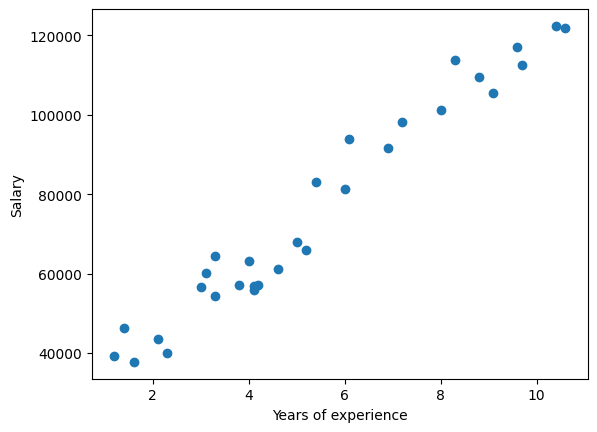

In [9]:
plt.scatter(df['YearsExperience'],df['Salary'] )
plt.xlabel('Years of experience')
plt.ylabel('Salary')

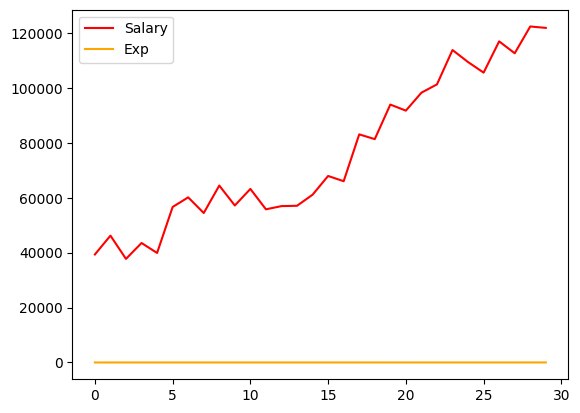

In [10]:
plt.plot(df['Salary'], color = 'red',label = 'Salary')
plt.plot(df['YearsExperience'], color = 'orange', label = 'Exp')
plt.legend()
plt.show()

Splitting into dependent and independent attributes

In [11]:
X = df['YearsExperience']
y = df['Salary']

Train test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)

Scaling data

In [13]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train.values.reshape(-1,1))
X_test = scale.transform(X_test.values.reshape(-1,1))

In [14]:
print("Min || Max (X_train)")
print(f"{min(X_train)}\t{max(X_train)}")

Min || Max (X_train)
[-1.36666691]	[2.07440513]


Fitting in regression model

In [15]:
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.9414466227178215

Prediction on test attributes

In [16]:
y_pred = reg.predict(X_test)

Evaluation function

In [17]:
def evaluate(model):
    pred = model.predict(X_test)

    print("Explained variance score :", explained_variance_score(y_test, y_pred))
    print('R2 score :', r2_score(y_test, y_pred),'\n')

    print('Original values data')
    print('Variance :',np.var(y_test))
    print('Mean :',np.mean(y_test),'\n')
    print('Predicted values data')
    print('Variance :',np.var(pred))
    print('Mean :',np.mean(pred))

    plt.scatter(X_test, y_test, color = 'blue', label = 'Actual')
    plt.scatter(X_test, pred, color = 'orange', label = 'predicted')
    plt.legend()
    plt.show()

Accuracy score

In [18]:
score = r2_score(y_test, y_pred)
print("Accuracy :",score*100)

Accuracy : 94.14466227178215


Evaluation of Linear Regression

Explained variance score : 0.9451362475941302
R2 score : 0.9414466227178215 

Original values data
Variance : 645302870.9876543
Mean : 87543.88888888889 

Predicted values data
Variance : 588433792.0895215
Mean : 86000.86409143766


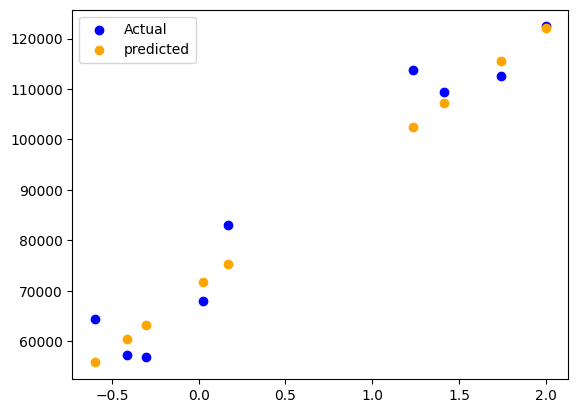

In [19]:
evaluate(reg)

Gradient boost regressor

In [20]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

0.894473333093494

Evaluation of gradient boost regressor

Explained variance score : 0.9451362475941302
R2 score : 0.9414466227178215 

Original values data
Variance : 645302870.9876543
Mean : 87543.88888888889 

Predicted values data
Variance : 667116140.804688
Mean : 83480.55866943758


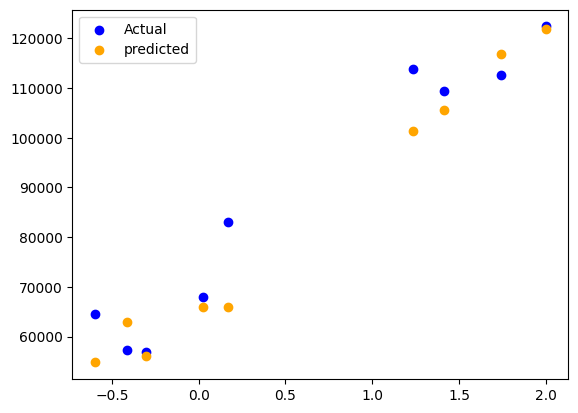

In [21]:
evaluate(gb)